#Problem 1 (Stats)

#1. library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns

librari yang digunakan pada tugas kali ini adalah yang diatas

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rionmarianto/file_tambahan/main/austin_waste_and_diversion.csv')

In [3]:
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00.000000 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00.000000 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00.000000 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00.000000 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00.000000 UTC,TIRES,1400.0,MRF


In [4]:
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-03-01,2021-03-01 11:26:00.000000 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00.000000 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00.000000 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00.000000 UTC,ORGANICS,5640.0,ORGANICS BY GOSH
26156,2021-03-01,2021-03-01 10:22:00.000000 UTC,RECYCLED METAL,360.0,AUSTIN IRON AND METAL


#1 memperbaiki missing value

sebelum mengolah data lakutan scan missing value terlebih dahulu dan bersihkan missing value nya

In [5]:
df.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

In [6]:
df['load_weight'] = df['load_weight'].fillna(df['load_weight'].median())

In [7]:
df.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

#2 ekplorasi data

Melihat rentang waktu pengambilan data,
Ada apa saja tipe load sampah di kota Austin berdasarkan data,
Mengetahui tempat pembuangan sampah ada dimana saja

In [8]:
df["report_date"].agg(("min", "max"))

min    2021-01-01
max    2021-07-09
Name: report_date, dtype: object

In [9]:
df.loc[df["report_date"] == "2021-07-09", "load_weight"].sum()

176840.0

In [10]:
df.loc[df["report_date"] == "2021-07-08", "load_weight"].sum()

1541950.0

In [11]:
df["report_date"].value_counts()

2021-02-25    277
2021-03-08    273
2021-03-22    258
2021-02-24    257
2021-03-10    256
             ... 
2021-01-30      5
2021-01-01      4
2021-05-30      1
2021-02-07      1
2021-04-18      1
Name: report_date, Length: 166, dtype: int64

In [12]:
df["dropoff_site"].value_counts()

TDS LANDFILL             10694
ORGANICS BY GOSH          5755
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1655
ONION CREEK                813
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 75
GREAT NORTHERN              70
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
ST. EDWARDS                  1
WILCAB                       1
Name: dropoff_site, dtype: int64

In [13]:
df["load_type"].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

#3 central tendency

menghitung mode, median, dan mean di seluruh site dan menghitung per site

In [14]:
print ('Min: ' + str(df["load_weight"].min()))
print ('Mode: ' + str(df["load_weight"].mode()[0]))
print ('Median: ' + str(df["load_weight"].median()))
print ('Mean: ' + str(df["load_weight"].mean()))
print ('Max: ' + str(df["load_weight"].max()))

Min: 0.0
Mode: 11300.0
Median: 11300.0
Mean: 12189.989889490384
Max: 245540.0


central tedency site park bend

In [15]:
print ('Min: ' + str(df.loc[df["dropoff_site"] == "PARK BEND", "load_weight"].min()))
print ('Mode: ' + str(df.loc[df["dropoff_site"] == "PARK BEND", "load_weight"].mode()[0]))
print ('Median: ' + str(df.loc[df["dropoff_site"] == "PARK BEND", "load_weight"].median()))
print ('Mean: ' + str(df.loc[df["dropoff_site"] == "PARK BEND", "load_weight"].mean()))
print ('Max: ' + str(df.loc[df["dropoff_site"] == "PARK BEND", "load_weight"].max()))

Min: 8480.0
Mode: 8480.0
Median: 12330.0
Mean: 13385.0
Max: 20400.0


central tedency site great notern

In [16]:
print ('Min: ' + str(df.loc[df["dropoff_site"] == "GREAT NORTHERN", "load_weight"].min()))
print ('Mode: ' + str(df.loc[df["dropoff_site"] == "GREAT NORTHERN", "load_weight"].mode()[0]))
print ('Median: ' + str(df.loc[df["dropoff_site"] == "GREAT NORTHERN", "load_weight"].median()))
print ('Mean: ' + str(df.loc[df["dropoff_site"] == "GREAT NORTHERN", "load_weight"].mean()))
print ('Max: ' + str(df.loc[df["dropoff_site"] == "GREAT NORTHERN", "load_weight"].max()))

Min: 8700.0
Mode: 11300.0
Median: 11300.0
Mean: 11973.142857142857
Max: 24880.0


In [17]:
print ('Min: ' + str(df.loc[df["dropoff_site"] == "TDS LANDFILL", "load_weight"].min()))
print ('Mode: ' + str(df.loc[df["dropoff_site"] == "TDS LANDFILL", "load_weight"].mode()[0]))
print ('Median: ' + str(df.loc[df["dropoff_site"] == "TDS LANDFILL", "load_weight"].median()))
print ('Mean: ' + str(df.loc[df["dropoff_site"] == "TDS LANDFILL", "load_weight"].mean()))
print ('Max: ' + str(df.loc[df["dropoff_site"] == "TDS LANDFILL", "load_weight"].max()))

Min: 0.0
Mode: 20.0
Median: 14920.0
Mean: 15168.321726145503
Max: 245540.0


perbandingan load weight di great northrn dan park bend tidak terlalu jauh berbeda dengan tds landfill load weight disana sangat tinggi yaitu mencapai max 245540

#4 site great notern

menarik perhatian saya karena jumlah drop off nya tidak terlalu banyak dan tidak terlalu sedikit jadi agak mudah untuk mengolah datanya

#5 cek outlier pada load_weight

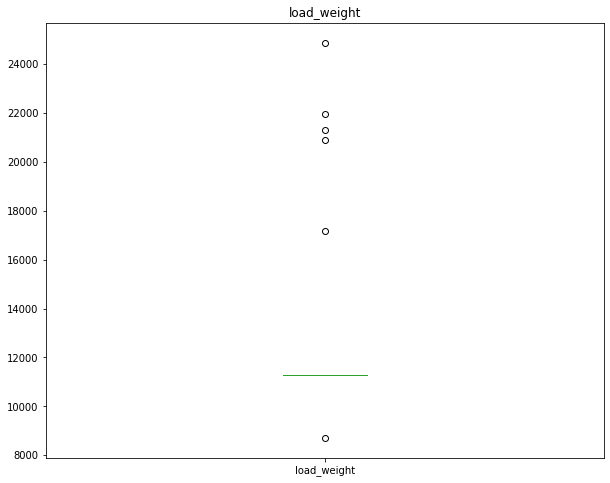

In [18]:
df.loc[df["dropoff_site"] == "GREAT NORTHERN", "load_weight"].plot(kind='box', title='load_weight', figsize=(10,8))

Ada outlier pada kolom load_weight pada site Great nothern

karna distribusi nya normal maka kita gunakan metode std

In [19]:
upper_limit= df.loc[df["dropoff_site"] == "GREAT NORTHERN", "load_weight"].mean() + 3*df.loc[df["dropoff_site"] == "GREAT NORTHERN", "load_weight"].std() 
lower_limit= df.loc[df["dropoff_site"] == "GREAT NORTHERN", "load_weight"].mean() - 3*df.loc[df["dropoff_site"] == "GREAT NORTHERN", "load_weight"].std() 

print(upper_limit)
print(lower_limit)

20048.81896483027
3897.466749455445


In [20]:
df[df['load_weight'] > upper_limit].shape

(3701, 5)

In [21]:
df[df['load_weight'] < lower_limit].shape

(2281, 5)

dibawah merupakan perbandingan central tendency yang telah dikeluarkan outliernya dengan yang belum

In [22]:
data_outlier_avg = df[(df['load_weight'] > upper_limit) | (df['load_weight'] < lower_limit)]
data_outlier_avg.describe()

,load_weight
count,5982.000000
mean,15893.188656
std,11851.442556
min,0.000000
25%,3000.000000
50%,21350.000000
75%,24480.000000
max,245540.000000


In [23]:
df.describe()

,load_weight
count,26157.000000
mean,12189.989889
std,6993.021349
min,0.000000
25%,7280.000000
50%,11300.000000
75%,16060.000000
max,245540.000000


#6 range, variance, dan standar deviasi

menghitung range, variance, dan standar deviasi pada site great northern

In [24]:
df.loc[df["dropoff_site"] == "GREAT NORTHERN", "load_weight"].value_counts()

11300.0    64
17160.0     1
20900.0     1
21320.0     1
21960.0     1
24880.0     1
8700.0      1
Name: load_weight, dtype: int64

#standar deviasi 

In [25]:
lw = df.loc[df["dropoff_site"] == "GREAT NORTHERN", "load_weight"]
lw.std()

2691.892035895804

#variance

In [26]:
lw.var()

7246282.732919255

#range

In [27]:
min= df.loc[df["dropoff_site"] == "GREAT NORTHERN", "load_weight"].min()

In [28]:
max= df.loc[df["dropoff_site"] == "GREAT NORTHERN", "load_weight"].max()

In [29]:
max-min

16180.0

#7 confidence interval

menambah site baru berdasarkan perhitungan confidence interval dari seluruh site

In [30]:
mixed_litter = df[df['load_type']=='MIXED LITTER']

In [31]:
t_stat,p_val = stats.ttest_1samp(mixed_litter['load_weight'], 2900)

print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.001328047794911612
t-statistics: 3.237720747970184


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


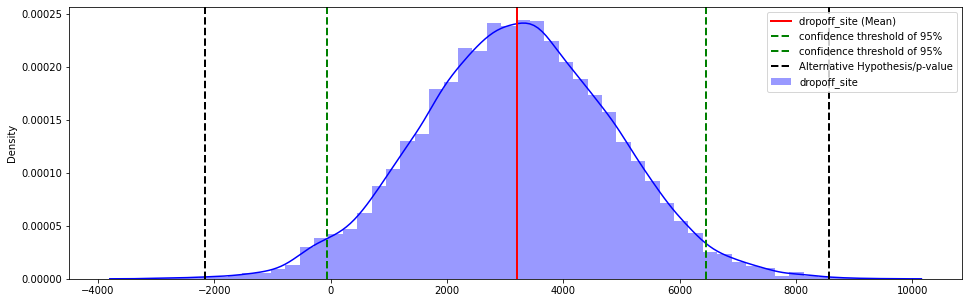

In [32]:
pop = np.random.normal(mixed_litter['load_weight'].mean(),mixed_litter['load_weight'].std(), 10000)

ci = stats.norm.interval(0.95, mixed_litter['load_weight'].mean(), mixed_litter['load_weight'].std())

plt.figure(figsize=(16,5))
sns.distplot(pop, label='dropoff_site', color='blue')
plt.axvline(mixed_litter['load_weight'].mean(), color='red', linewidth=2, label='dropoff_site (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(pop.mean() + t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis/p-value')
plt.axvline(pop.mean() - t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

#8 analisa uji hipotesis

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/rionmarianto/file_tambahan/main/austin_waste_and_diversion.csv')
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00.000000 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00.000000 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00.000000 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00.000000 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00.000000 UTC,TIRES,1400.0,MRF


In [34]:
for i in ['load_type', 'dropoff_site']:
    print(i, ':')
    print(df[i].value_counts())
    print('-'*50)

load_type :
GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64
--------------------------------------------------
dropoff_site :
TDS LANDFILL             10694
ORGANICS BY GOSH          5755
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1655
ONION CREEK                813
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 75
GREAT NORTHERN              70
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOOD

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
load_weight,25109.0,12227.136307,7135.059565,0.0,7060.0,11300.0,16380.0,245540.0


In [36]:
mixed_litter = df[df['load_type']=='MIXED LITTER']

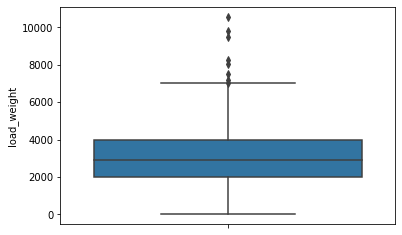

In [37]:
sns.boxplot(data=mixed_litter, y='load_weight')

In [38]:
mixed_litter.head()

,report_date,load_time,load_type,load_weight,dropoff_site
592,2021-05-01,2021-05-01 11:14:00.000000 UTC,MIXED LITTER,5060.0,TDS LANDFILL
593,2021-05-08,2021-05-08 12:33:00.000000 UTC,MIXED LITTER,4620.0,TDS LANDFILL
607,2021-02-21,2021-02-21 12:00:00.000000 UTC,MIXED LITTER,1760.0,TDS LANDFILL
612,2021-02-27,2021-02-27 07:02:00.000000 UTC,MIXED LITTER,780.0,TDS LANDFILL
613,2021-03-20,2021-03-20 11:25:00.000000 UTC,MIXED LITTER,1920.0,TDS LANDFILL


In [39]:
mixed_litter.describe().T

,count,mean,std,min,25%,50%,75%,max
load_weight,329.0,3196.899696,1663.291291,0.0,1980.0,2900.0,4000.0,10560.0


load_weight memiliki rata-rata sebesar 3196.89, berdasarkan data tersebut dapat dibuat hipotesis berupa:

H0 = Rata-rata load-weight >= 2900, 

H1 = Rata-rata load-weight < 2900

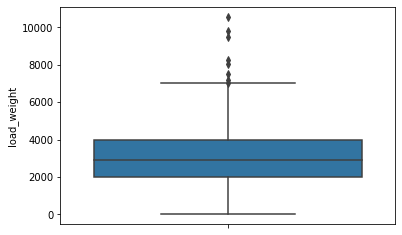

In [40]:
sns.boxplot(data=mixed_litter, y='load_weight')

In [41]:
t_stat,p_val = stats.ttest_1samp(mixed_litter['load_weight'], 2900)

print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.001328047794911612
t-statistics: 3.237720747970184


1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!

menggunakan teknik std karena distribusi nya masih normal

2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?

untuk menambah site baru berdasarkan perhitungan confidence interval dari seluruh site

3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

menggunakan jenis huji hipotesis 1 sample 2 tailed

#Problem 2 (Math/Calculus)

In [42]:
df.groupby("report_date", sort=True)["load_weight"].sum()

report_date
2021-01-01          0.0
2021-01-02    2170130.0
2021-01-04    2920260.0
2021-01-05    2388540.0
2021-01-06    2396550.0
                ...    
2021-07-05    1897290.0
2021-07-06    1921640.0
2021-07-07    1553080.0
2021-07-08    1417650.0
2021-07-09     120340.0
Name: load_weight, Length: 166, dtype: float64

mencari v 
v=delta(w)/delta(t)=w1-w0/t1-t0
t1=9
t0=8

In [43]:
w1=df.loc[df["report_date"] == "2021-07-09", "load_weight"].sum()
w0=df.loc[df["report_date"] == "2021-07-08", "load_weight"].sum()
t1=9
t0=8
v=(w1-w0)/(t1-t0)
v

-1297310.0

In [44]:
deltaT=1
w_besok=w1+v*deltaT
w_besok

-1176970.0

karena data load_weight pada tgl 9 lebih sedikit dari tgl 8 maka hasilnya minus, coba kita gunakan tgl 8 dan 7 untuk perbandingan



In [45]:
w2=df.loc[df["report_date"] == "2021-07-07", "load_weight"].sum()
t2=7
v2=(w0-w2)/(t0-t2)
v2

-135430.0

In [46]:
deltaT=1
w_besok2=w1+v2*deltaT
w_besok2

-15090.0

jika menggunakan data tgl 8 dan tgl 7 maka hasil perkiraan load_weigh nya adalah 165710

1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?

derivatif

2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya?

ya, karena w1 dan w0 memiliki hubungan

3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?

165710





kesimpulan dari analisa diatas ialah dari pengambilan data ditahun 2021 masih terdapat missing value.

tempat pembuangan terbanyak terdapat pada site TDS LANDFILL 

Ada outlier pada kolom load_weight pada site Great nothern

karena data load_weight pada tgl 9 lebih sedikit dari tgl 8 dan menghasilkan hasil minus, disini kita mencoba gunakan tgl 8 dan 7 untuk perbandingan dan mendapat hasil 165710 jumlah load_weight untuk hari esok atau tgl 10